## Intro

Fashion MNIST is in the same format as MNIST, but more challenging. For example this same program would get around 98% accuracy on standard MNIST, but will get around 88% accuracy on Fashion MNIST.

I did a PR in tinygrad to add this feature here https://github.com/tinygrad/tinygrad/pull/6961 and it got merged.

Outside a notebook, this can be done:
    FASHION=1 python3 ./examples/beautiful_mnist.py

## Dataset

In [1]:
from tinygrad.nn.datasets import mnist
X_train, Y_train, X_test, Y_test = mnist(fashion=1)
print(X_train.shape, X_train.dtype, Y_train.shape, Y_train.dtype)
# (60000, 1, 28, 28) dtypes.uchar (60000,) dtypes.uchar

(60000, 1, 28, 28) dtypes.uchar (60000,) dtypes.uchar


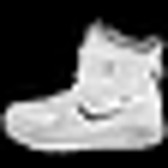

In [2]:
from IPython.display import display
import numpy as np
from PIL import Image

reshaped = X_train[0].reshape(28, 28)
nparray = reshaped.numpy()
nparray = nparray.astype(np.uint8)
img = Image.fromarray(nparray)
img = img.resize((168, 168))

display(img)

## Model

In [3]:
from tinygrad import Tensor, nn

class Model:
  def __init__(self):
    self.l1 = nn.Conv2d(1, 32, kernel_size=(3,3))
    self.l2 = nn.Conv2d(32, 64, kernel_size=(3,3))
    self.l3 = nn.Linear(1600, 10)

  def __call__(self, x:Tensor) -> Tensor:
    x = self.l1(x).relu().max_pool2d((2,2))
    x = self.l2(x).relu().max_pool2d((2,2))
    return self.l3(x.flatten(1).dropout(0.5))

model = Model()

## Train

In [4]:
from tinygrad import TinyJit

optim = nn.optim.Adam(nn.state.get_parameters(model))
batch_size = 128

@TinyJit
def step():
  Tensor.training = True  # makes dropout work
  samples = Tensor.randint(batch_size, high=X_train.shape[0])
  X, Y = X_train[samples], Y_train[samples]
  optim.zero_grad()
  loss = model(X).sparse_categorical_crossentropy(Y).backward()
  optim.step()
  return loss

In [5]:
for i in range(7000):
  loss = step()
  if i%100 == 0:
    Tensor.training = False
    acc = (model(X_test).argmax(axis=1) == Y_test).mean().item()
    print(f"step {i:4d}, loss {loss.item():.2f}, acc {acc*100.:.2f}%")

step    0, loss 30.94, acc 17.11%
step  100, loss 0.70, acc 79.67%
step  200, loss 0.61, acc 80.67%
step  300, loss 0.83, acc 81.28%
step  400, loss 0.64, acc 81.33%
step  500, loss 0.51, acc 81.80%
step  600, loss 0.70, acc 82.62%
step  700, loss 0.36, acc 83.85%
step  800, loss 0.52, acc 83.24%
step  900, loss 0.49, acc 84.36%
step 1000, loss 0.50, acc 84.34%
step 1100, loss 0.47, acc 85.09%
step 1200, loss 0.40, acc 84.37%
step 1300, loss 0.61, acc 85.41%
step 1400, loss 0.48, acc 85.32%
step 1500, loss 0.45, acc 86.37%
step 1600, loss 0.50, acc 86.13%
step 1700, loss 0.40, acc 86.27%
step 1800, loss 0.43, acc 86.35%
step 1900, loss 0.37, acc 85.92%
step 2000, loss 0.41, acc 85.92%
step 2100, loss 0.38, acc 86.90%
step 2200, loss 0.28, acc 86.47%
step 2300, loss 0.33, acc 86.96%
step 2400, loss 0.41, acc 86.22%
step 2500, loss 0.35, acc 86.91%
step 2600, loss 0.45, acc 87.15%
step 2700, loss 0.30, acc 87.00%
step 2800, loss 0.24, acc 86.89%
step 2900, loss 0.32, acc 86.87%
step 3000